In [ ]:
!pip install --upgrade seaborn
!pip install --upgrade google-cloud
!pip install --upgrade scipy
!pip install --upgrade numpy

# PROPER MATPLOTLIB INSTALLER

!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

# Note: The previous command,  
# !pip install --upgrade matplotlib 
# , !!!DOES NOT WORK ANYMORE!!! ... 
# This function of matplotlib has been deprecated for subsequent package updates

from google.colab import drive, files, auth
drive.mount('/content/drive', force_remount = True)

# MAKING IT PLOT

Forcing compiler to garbage collect unneeded variables...Stand by...



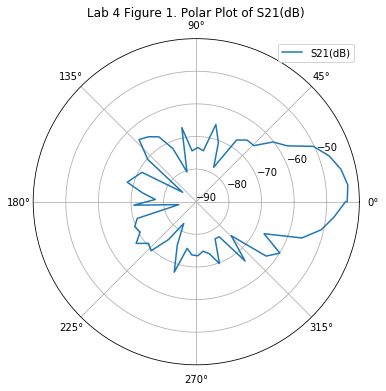

Fig 1 printed...



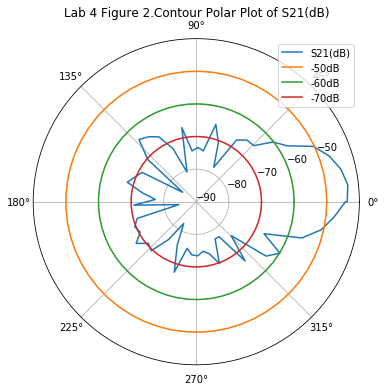

Fig 2 printed...



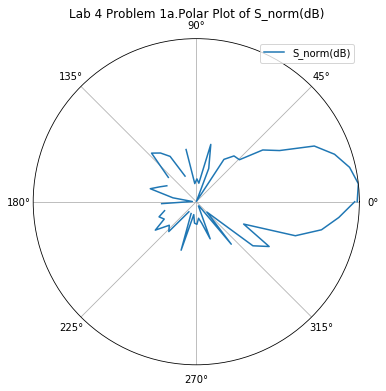

Problem 1a printed...



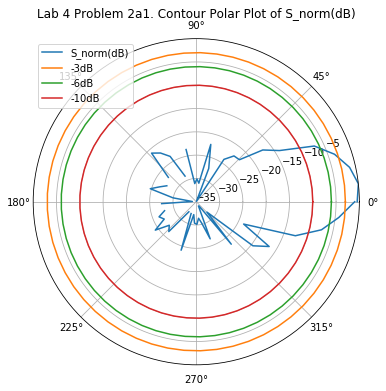

Problem 2a1 printed...



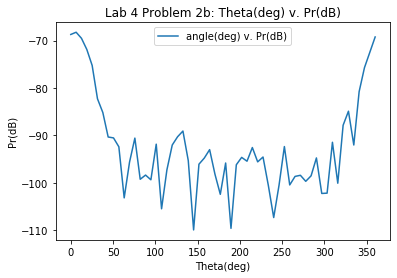

Problem 2b printed...



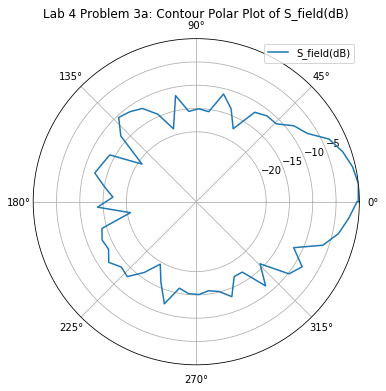

Problem 3a printed...



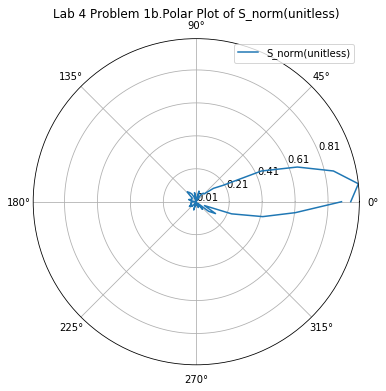

Problem 1b printed...



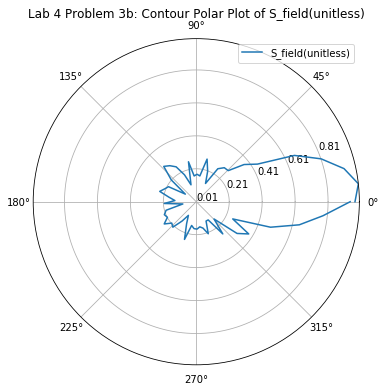

Problem 3b printed...

Garbage dump...
Stand...*urp* back...



In [ ]:
#! /usr/bin/env
# -*- coding: utf-8 -*-
import numpy as np, seaborn as sns, pandas as pd, scipy as sci, math
import matplotlib.transforms as mt, gc, sys, matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy 
# from scipy.spatial import ConvexHull
# from matplotlib.collections import PolyCollection
#Use Commented ONLY if Polygonal, Linear Representation on Polar Plot, 
# and use ConvexHull to accumulate data points on a single plot...

# EXECUTION
# Reading in data from Excel: 
def read_excel_sheets(xls_path):
    # Derived from URL: https://www.caktusgroup.com/blog/2019/08/13/import-multiple-excel-sheets-pandas/ 
      # print(f"Loading {xls_path} into pandas\n")
      xl = pd.ExcelFile(xls_path)
      df = pd.DataFrame()
      columns = None
      for idx, name in enumerate(xl.sheet_names):
          # print(f'Reading sheet #{idx + 1}: {name}')
          sheet = xl.parse(name)
          if idx == 0:
          # Save column names from the first sheet to match for append
             columns = sheet.columns
             sheet.columns = columns
          # Assume index of existing data frame when appended
          df = df.append(sheet, ignore_index=True)
      # del (sheet)
      # del (xl)
      # del (columns)
      gc.collect()
      print(f"Forcing compiler to garbage collect unneeded variables...Stand by...\n")
      return df        

ABS_PATHNAME= 'drive/MyDrive/Colab Notebooks/EE517/Lab_Data/Lab_4/Lab 4 S21 Hplane Narda640.xlsx'
df = read_excel_sheets(ABS_PATHNAME) # read in df as the method up top, by PATHNAME
#following scipy example: 
try: 

    # Figure 1,2 Data:
    angleDegData = df["Theta(deg)"]
    angleRadData = df["Theta(rad)"]
    S21_unitless = df["S21(unitless)"]
    S21_dB = df["S21(dB)"] # our plotted values Fig 1,2. Due to the 'dB' unit restriction
    # for polar plot, apparently, this won't plot any unitless values, but trust that 
    # they were available/ present regardless... 
    S_norm_unitless = df["S_norm(unitless)"]
    S_norm_dB = df["S_norm(dB)"] # 'Normalized Power Pattern(dB)'
    S_field_unitless = df["S_field(unitless)"]
    S_field_dB = df["S_field(dB)"] # 'Normalized Field Pattern(dB)'
    P_rec_dB= df["Pr(dB)"] 

    n = 58 # length of predominant vectors in excel file
    #Figure 1: theta(rad) v. S21(dB) Polar Plot Default 
    fig1 = plt.figure(figsize=(6,6))
    axF1 = fig1.add_subplot(111,polar=True)
    axF1.plot(angleRadData, S21_dB, label='S21(dB)') #theta,power_gain(dB)
    axF1.set_ylim(-90,-40)
    axF1.set_yticks(np.arange(-90,-40,10)) 
    plt.title("Lab 4 Figure 1. Polar Plot of S21(dB)")
    plt.legend() 
    plt.savefig("Lab4_Figure1_Python.png")
    plt.show()
    print("Fig 1 printed...\n")

    #Figure 2: theta(rad) v. S21(dB) Polar Plot Default 
    fig2 = plt.figure(figsize=(6,6))
    axF2 = fig2.add_subplot(111,polar=True)
    axF2.plot(angleRadData, S21_dB, label='S21(dB)') # theta, power_gain(dB)
    axF2.plot(angleRadData,[-50 for el in angleRadData], label='-50dB')
    axF2.plot(angleRadData,[-60 for el in angleRadData], label='-60dB')
    axF2.plot(angleRadData,[-70 for el in angleRadData], label='-70dB') #gain = {-50,-60,-70}dB 
    axF2.set_ylim(-90,-40)
    axF2.set_yticks(np.arange(-90,-40,10)) 
    plt.legend()
    plt.title("Lab 4 Figure 2.Contour Polar Plot of S21(dB)")
    plt.savefig("Lab4_Figure2_Python.png")
    plt.show()
    print("Fig 2 printed...\n")

    # Problem 1a,2a: theta(rad) v. P_norm(dB) Polar Plot (default,contour) 
    figP1 = plt.figure(figsize=(6,6))
    axP1 = figP1.add_subplot(111,polar=True)
    axP1.plot(angleRadData, S_norm_dB, label='S_norm(dB)') #theta,power_gain(dB)
    axP1.set_ylim(-35,0)
    axP1.set_yticks(np.arange(-35,0,-5)) 
    plt.legend()
    plt.title("Lab 4 Problem 1a.Polar Plot of S_norm(dB)")
    plt.savefig("Lab4_Problem1a_Python.png")
    # plt.grid(True)
    plt.show()
    print("Problem 1a printed...\n")

    figP2 = plt.figure(figsize=(6,6))
    axP2 = figP2.add_subplot(111,polar=True)
    axP2.plot(angleRadData, S_norm_dB, label='S_norm(dB)') #theta,power_gain(dB)
    axP2.plot(angleRadData,[-3 for el in angleRadData], label='-3dB')
    axP2.plot(angleRadData,[-6 for el in angleRadData], label='-6dB')
    axP2.plot(angleRadData,[-10 for el in angleRadData], label='-10dB') # gain = {-3,-6,-10}dB
    axP2.set_ylim(-35,0)
    axP2.set_yticks(np.arange(-35,0,5))
    # plt.grid(True)
    plt.legend()
    plt.title("Lab 4 Problem 2a1. Contour Polar Plot of S_norm(dB)")
    plt.savefig("Lab4_Problem2a1_Python.png")
    plt.show()
    print("Problem 2a1 printed...\n")

    plt.plot(angleDegData,P_rec_dB, label='angle(deg) v. Pr(dB)')
    plt.xlabel('Theta(deg)')
    plt.ylabel('Pr(dB)')
    plt.title("Lab 4 Problem 2b: Theta(deg) v. Pr(dB)")
    plt.legend()
    plt.savefig("Lab4_Problem2b_Python.png")
    plt.show()
    print("Problem 2b printed...\n")

    # Problem 3a: Contour S_field_dB polar plot: 
    figP3 = plt.figure(figsize=(6,6))
    axP3 = figP3.add_subplot(111,polar=True)
    axP3.plot(angleRadData, S_field_dB, label='S_field(dB)') #theta,power_gain(dB)
    axP3.set_ylim(-35,0)
    axP3.set_yticks(np.arange(-20,0,5))
    # plt.grid(True)
    plt.legend()
    plt.title("Lab 4 Problem 3a: Contour Polar Plot of S_field(dB)")
    plt.savefig("Lab4_Problem3a_Python.png")
    plt.show()
    print("Problem 3a printed...\n")
    #--------------------------------------------------------------------------
    # Problem 2a: theta(rad) v. P_norm(dB) Polar Plot (default,contour) 
    figP1 = plt.figure(figsize=(6,6))
    axP1 = figP1.add_subplot(111,polar=True)
    axP1.plot(angleRadData, S_norm_unitless, label='S_norm(unitless)') #theta,power_gain(unitless)
    axP1.set_ylim(0.01,1.0)
    axP1.set_yticks(np.arange(0.01,1.0,0.20)) 
    plt.legend()
    plt.title("Lab 4 Problem 1b.Polar Plot of S_norm(unitless)")
    plt.savefig("Lab4_Problem1b_Python.png")
    # plt.grid(True)
    plt.show()
    print("Problem 1b printed...\n")

    # Problem 3b: Contour S_field_unitless polar plot: 
    figP3 = plt.figure(figsize=(6,6))
    axP3 = figP3.add_subplot(111,polar=True)
    axP3.plot(angleRadData, S_field_unitless, label='S_field(unitless)') #theta,power_gain(unitless)
    axP3.set_ylim(0.01,1.0)
    axP3.set_yticks(np.arange(0.01,1.0,0.20))
    # plt.grid(True)
    plt.legend()
    plt.title("Lab 4 Problem 3b: Contour Polar Plot of S_field(unitless)")
    plt.savefig("Lab4_Problem3b_Python.png")
    plt.show()
    print("Problem 3b printed...\n")

    #Garbage Collection PostRef    
    del (figP1)
    del (figP2)
    del (figP3)
    del (fig1)
    del (fig2)
    del (axP1)
    del (axP2)
    del (axP3)
    del (axF1)
    del (axF2)
    gc.collect()
    print(f"Garbage dump...\nStand...*urp* back...\n") 

except:
  print(f"An error/exception has occurred...\nCheck stack trace, then try again...\n")

% Importing from Excel and creating polar plot clear all; close all; % Imports specified range and saves as array 'angle' angle = xlsread('Lab 4 S21 Hplane Narda640.xlsx','A2:A59'); % Imports specified range and saves as array 'S21' S21 = xlsread('Lab 4 S21 Hplane Narda640.xlsx','B2:B59'); % Generic Polar Plot figure;

polarplot(angle.*pi/180,S21,'-r','linewidth',1); % Note that angle must converted to radians!

% title('Problem 1'); rlim([-90 -40]);

% Polar plot with rings at -50,-60, and -70 dB % Create theta array of length N from 0 to 2pi theta = 0:0.1:2*pi; N = length(theta);

% Create circles at -50dB and -60dB. Circle is (r,theta) for r = -50 or -60 and theta from 0 to 2pi r50 = -50.ones(1,N); r60 = -60.ones(1,N);

figure; polarplot(angle.*(pi/180),S21,'-r','linewidth',1); hold on; polarplot(theta,r50,'--k'); % -50dB line hold on; polarplot(theta,r60,'-.k'); % -60dB line title('Generic Title'); legend('S21','-50dB','-60dB'); rlim([-90 -40]);